When we are dealing with machine learning datasets, many times, we have higher dimensional data than just the easy 2 dimensions. This makes us difficult to visualize the data to get a sense how different dimensions have a relationship with each other, or is there a hidden structure inside it. Today, I will show you what is my way to visualize the higher dimensional datasets. 

I summarize the way to visualize high dimensional data into 2 groups:

1. Using algorithms to reduce dimension
2. Clever way to plot

Let's first see how to use algorithms to visualize the data. In this blog, we will use the [IRIS dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to show how different methods work. 

### Let's first load data

In [27]:
from sklearn import datasets

In [43]:
# import the IRIS data
iris = datasets.load_iris()
iris_data = iris.data
Y = iris.target

print('There are %d features'%(iris_data.shape[1]))
print('There are %d classes'%(len(set(Y))))

There are 4 features
There are 3 classes


## 1 Reduce dimension using algorithms
### 1.1 Visualize high dimensional data with PCA

Principal Component Analysis is the classical way to reduce the dimensions. In our case, we have 4 features, which means we have 4 dimensions, difficult to visualize. With PCA, we can plot the first two components, and get a sense of the patterns hidden behind the data. 

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-poster')

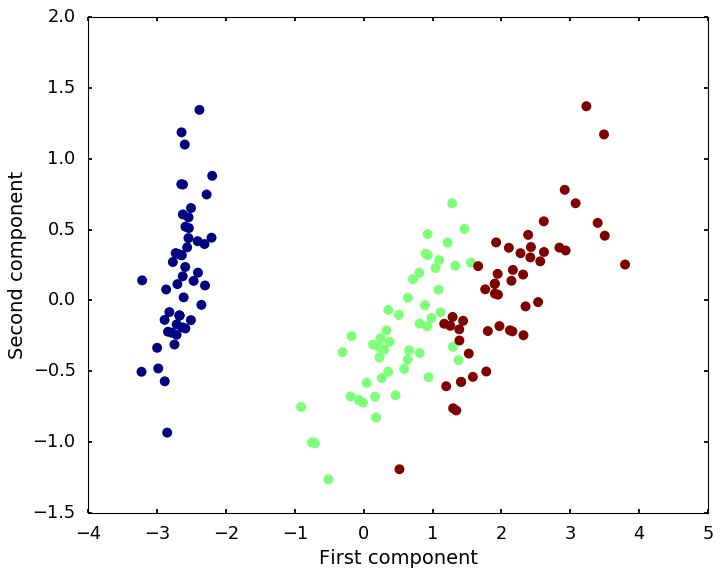

In [51]:
# Let's do a simple PCA and plot the first two components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris_data)

# plot the first two components
plt.figure(figsize = (10, 8))
plt.scatter(X_pca[:, 0], X_pca[:,1], c = Y, s = 80, linewidths=0)
plt.xlabel('First component')
plt.ylabel('Second component')

The above figure is showing the first two components of the PCA. I colored the dots with the 3 classes so that we can see the hidden structures. 

### 1.2 Visualize high dimensional data with t-SNE

[t-distributed stochastic neighbor embedding (t-SNE)](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) is a nonlinear dimensionality reduction technique that is particularly well-suited for embedding high-dimensional data into a space of two or three dimensions, which can then be visualized in a scatter plot.

In [39]:
from sklearn.manifold import TSNE

In [47]:
X_tsne = TSNE(learning_rate=100).fit_transform(iris_data)

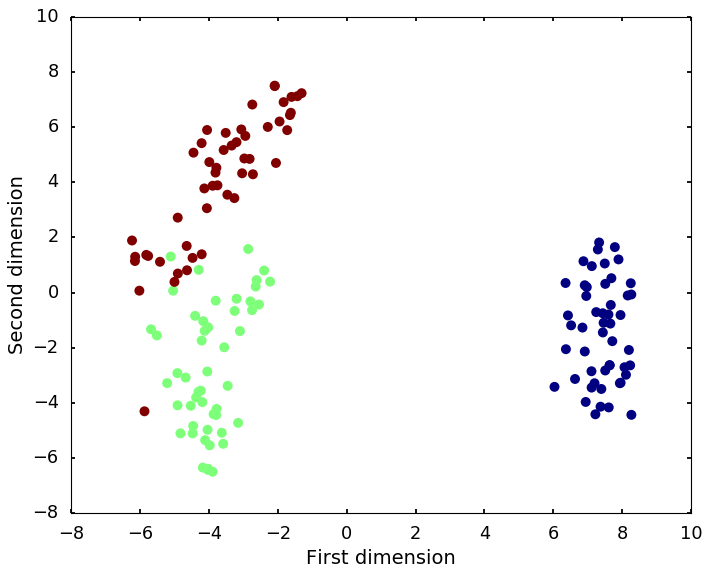

In [53]:
# plot the first two components
plt.figure(figsize = (10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:,1], c = Y, s = 80, linewidths=0)
plt.xlabel('First dimension')
plt.ylabel('Second dimension')

## 2 Clever way to plot

Also, there are many clever ways to plot the data so that we can get a sense of the data. [Pandas](http://pandas.pydata.org/) is the package I usually use for visualize high dimensional data. Here are some examples from [pandas visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html):

In [59]:
import pandas as pd
import numpy as np

In [84]:
# let's first put the data into a dataframe
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= [x[:-5] for x in iris['feature_names']] + ['target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### 2.1 Scatter plot matrices

We know that scatter plot is a great tool to visualize the relationship of two variables, if we put every two variable pairs into a scatter plot and make them into a nice matrix, it is the scatter plot matrices. From these plots, we can easily see if a pair of variables related with each other. 

In [77]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126270250>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12840f150>]], dtype=object)

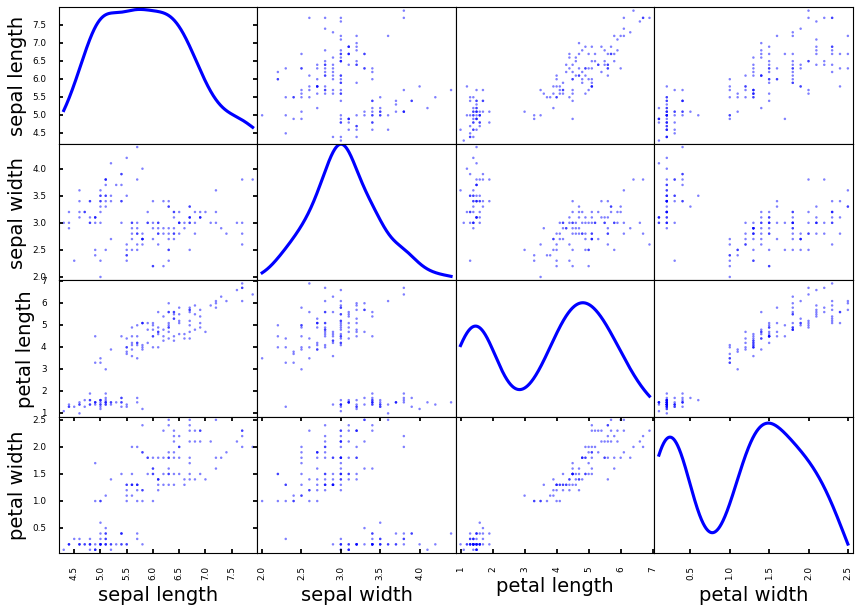

In [78]:
scatter_matrix(df[df.columns[[0, 1, 2, 3]]], diagonal = 'density')

### 2.2 Parallel Coordinates

[Parallel coordinates](https://en.wikipedia.org/wiki/Parallel_coordinates) are a common way of visualizing high-dimensional geometry and analyzing multivariate data. It allows one to see clusters in data and to estimate other statistics visually. Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.

In [79]:
from pandas.plotting import parallel_coordinates

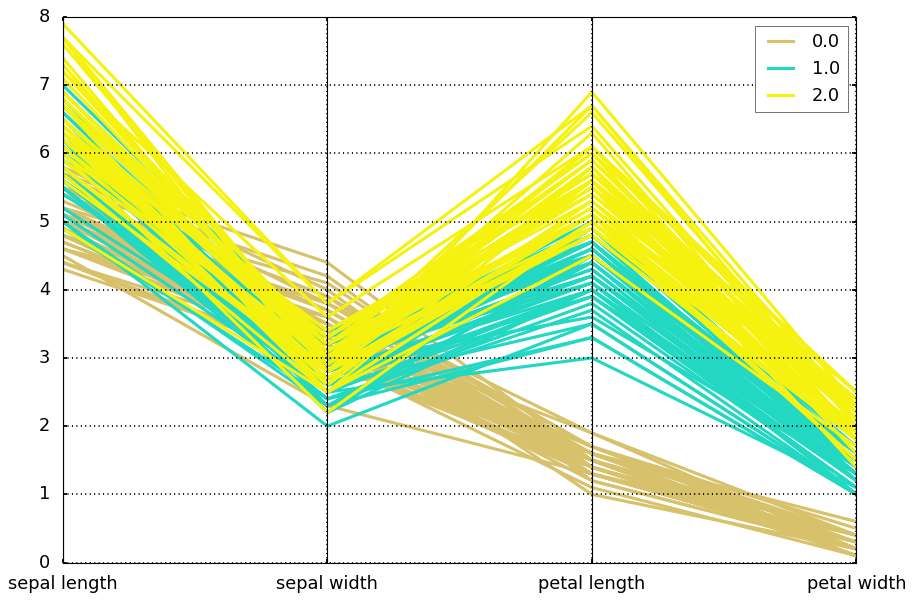

In [80]:
parallel_coordinates(df, 'target')

### 2.3 Andrews Curve

[Andrews curves](https://en.wikipedia.org/wiki/Andrews_plot) is another way to visualize structure in high-dimensional data. It is basically a smoothed version of parallel coordinates.  

In [86]:
from pandas.plotting import andrews_curves

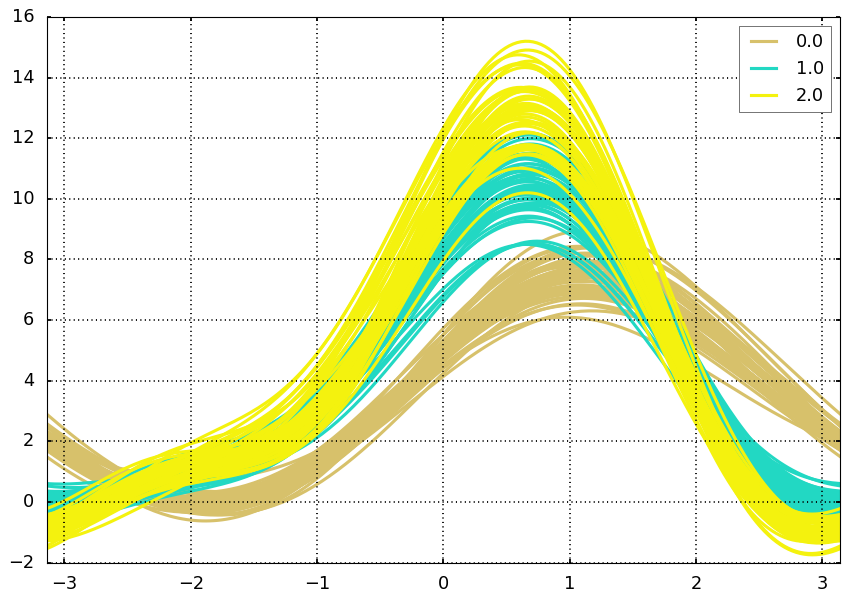

In [87]:
andrews_curves(df, 'target')

### 2.4 Radviz

[Radviz](http://www.agocg.ac.uk/reports/visual/casestud/brunsdon/radviz.htm) is another way of visualizing multi-variate data. It is based on a simple spring tension minimization algorithm. Basically you set up a bunch of points in a plane. In our case they are equally spaced on a unit circle. Each point represents a single attribute. You then pretend that each sample in the data set is attached to each of these points by a spring, the stiffness of which is proportional to the numerical value of that attribute (they are normalized to unit interval). The point in the plane, where our sample settles to (where the forces acting on our sample are at an equilibrium) is where a dot representing our sample will be drawn. Depending on which class that sample belongs it will be colored differently.

In [88]:
from pandas.plotting import radviz

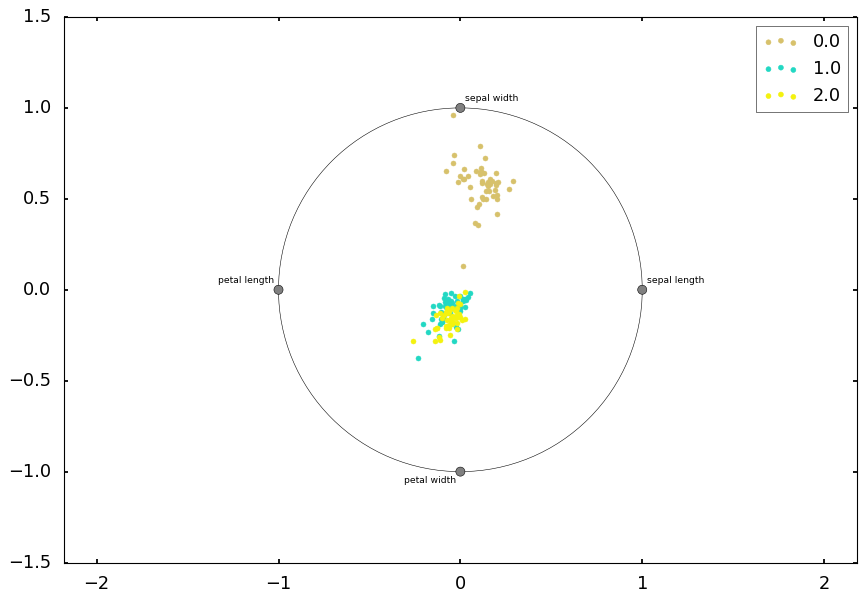

In [89]:
radviz(df, 'target')